In [72]:
 #numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

import time


#estimators\n",
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

# Performance metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix

#model metrics\n",
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation\n",
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# Loading CSV data

In [73]:
#data
rawData = pd.read_csv('default of credit card clients.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [74]:
rawData.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [75]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

# Correlation Analysis

In [76]:
corrMat = rawData.corr()

In [77]:
corrDefaultPayment = corrMat["default payment next month"]
corrDefaultPayment.sort_values(ascending = False)

default payment next month    1.000000
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
EDUCATION                     0.028006
AGE                           0.013890
BILL_AMT6                    -0.005372
BILL_AMT5                    -0.006760
BILL_AMT4                    -0.010156
ID                           -0.013952
BILL_AMT3                    -0.014076
BILL_AMT2                    -0.014193
BILL_AMT1                    -0.019644
MARRIAGE                     -0.024339
SEX                          -0.039961
PAY_AMT6                     -0.053183
PAY_AMT5                     -0.055124
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT2                     -0.058579
PAY_AMT1                     -0.072929
LIMIT_BAL                    -0.153520
Name: default payment nex

# Finding from Correlation Analysis

The most significant attributes are 

PAY_0                         0.324794

PAY_2                         0.263551

PAY_3                         0.235253

PAY_4                         0.216614

PAY_5                         0.204149

PAY_6                         0.186866

LIMIT_BAL                    -0.153520

# split to train and test Sets

In [78]:
#features, excluding ID attribute
X = rawData.iloc[:,1:-1]

#Dependent Variable
y = rawData.iloc[:,-1]

# split to train and test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=12345)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30000, 23), (30000,), (21000, 23), (9000, 23), (21000,), (9000,))

In [79]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [80]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [81]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

# Train, test with RandomForestClassifier

In [82]:
start_time = time.time()
rf = RandomForestClassifier(n_estimators = 400, max_depth = 50)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("--- %s seconds ---" % (time.time() - start_time))

[[6614  423]
 [1227  736]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7037
           1       0.64      0.37      0.47      1963

    accuracy                           0.82      9000
   macro avg       0.74      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000

--- 41.4359176158905 seconds ---


In [83]:
print(rf.get_params())

accuracy = rf.score(X_test, y_test) 
accuracy

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 50, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


0.8166666666666667

In [84]:
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 400, num = 10)]
# Number of features to consider at every split
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth = [int(x) for x in np.linspace(10, 50, num = 4)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               #'max_features': max_features,
               'max_depth': max_depth,
               #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf,
               #'bootstrap': bootstrap
              }
print(random_grid)

{'n_estimators': [20, 62, 104, 146, 188, 231, 273, 315, 357, 400], 'max_depth': [10, 23, 36, 50, None]}


In [85]:
start_time = time.time()
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#rf_random.fit(train_features, train_labels)
rf_random.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 10.5min finished


--- 697.4487099647522 seconds ---


In [86]:
rf_random.best_params_

{'n_estimators': 273, 'max_depth': 10}

In [87]:
rf_random.best_estimator_.feature_importances_

array([0.04231278, 0.00464397, 0.01044307, 0.00507097, 0.04046312,
       0.39197007, 0.08665606, 0.01298734, 0.02023147, 0.00877489,
       0.01636758, 0.04826323, 0.02500556, 0.02357835, 0.02217199,
       0.02236908, 0.0274729 , 0.02429679, 0.03711355, 0.03823113,
       0.0316524 , 0.02728226, 0.03264146])

In [88]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=273,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [90]:
final_model = RandomForestClassifier(n_estimators = 273, max_depth = 10)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6672  365]
 [1253  710]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7037
           1       0.66      0.36      0.47      1963

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



# Train, test with SGDClassifier

In [91]:
# build a classifier
classifierSGD = SGDClassifier()
classifierSGD.fit(X_train, y_train)
y_pred = classifierSGD.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7037    0]
 [1963    0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7037
           1       0.00      0.00      0.00      1963

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.69      9000



C:\Users\Cindy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [92]:
print(classifierSGD.get_params())

#accuracy = classifierSGD.score(X_test, y_test) 
#accuracy

{'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [93]:
# use a full grid over all parameters
param_grid = {"n_iter_no_change": [1, 5, 10],
              "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              "penalty": ["none", "l1", "l2"]}

In [94]:
classifierSGD = SGDClassifier()
# run grid search
#grid_search = GridSearchCV(classifierSGD, param_grid=param_grid)
grid_search = GridSearchCV(estimator = classifierSGD, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
start = time.time()
grid_search.fit(X_train, y_train)
 
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time.time() - start, len(grid_search.cv_results_)))
report(grid_search.cv_results_)

Fitting 3 folds for each of 63 candidates, totalling 189 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min


GridSearchCV took 111.29 seconds for 14 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.777 (std: 0.000)
Parameters: {'alpha': 0.001, 'n_iter_no_change': 1, 'penalty': 'l1'}

Model with rank: 2
Mean validation score: 0.777 (std: 0.000)
Parameters: {'alpha': 100, 'n_iter_no_change': 1, 'penalty': 'none'}

Model with rank: 2
Mean validation score: 0.777 (std: 0.000)
Parameters: {'alpha': 100, 'n_iter_no_change': 5, 'penalty': 'none'}



[Parallel(n_jobs=-1)]: Done 189 out of 189 | elapsed:  1.8min finished


In [98]:
grid_search.best_params_

{'alpha': 0.001, 'n_iter_no_change': 1, 'penalty': 'l1'}

In [99]:
grid_search.best_estimator_

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=1, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [97]:
final_model = grid_search.best_estimator_
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5076 1961]
 [1408  555]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      7037
           1       0.22      0.28      0.25      1963

    accuracy                           0.63      9000
   macro avg       0.50      0.50      0.50      9000
weighted avg       0.66      0.63      0.64      9000



# Train, test with KNeighborsClassifier

In [100]:
# Number of trees in KNeighborsClassifier
n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)]
leaf_size = [20, 30, 40]

# Create the param grid
param_grid = {'n_neighbors': n_neighbors, 'leaf_size': leaf_size}
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'leaf_size': [20, 30, 40]}


In [101]:
classifierKnn = KNeighborsClassifier()
# run grid search
grid_search = GridSearchCV(estimator = classifierKnn, param_grid = param_grid, scoring='accuracy',
                          cv = 3, n_jobs = -1, verbose = 2)
start = time.time()
grid_search.fit(X_train, y_train)
 
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time.time() - start, len(grid_search.cv_results_)))
report(grid_search.cv_results_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min


GridSearchCV took 92.61 seconds for 13 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.778 (std: 0.001)
Parameters: {'leaf_size': 20, 'n_neighbors': 20}

Model with rank: 2
Mean validation score: 0.778 (std: 0.001)
Parameters: {'leaf_size': 20, 'n_neighbors': 18}

Model with rank: 2
Mean validation score: 0.778 (std: 0.001)
Parameters: {'leaf_size': 30, 'n_neighbors': 18}

Model with rank: 2
Mean validation score: 0.778 (std: 0.001)
Parameters: {'leaf_size': 40, 'n_neighbors': 18}



[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.5min finished


In [102]:
grid_search.best_params_

{'leaf_size': 20, 'n_neighbors': 20}

In [103]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [104]:
final_model = grid_search.best_estimator_
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6849  188]
 [1798  165]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      7037
           1       0.47      0.08      0.14      1963

    accuracy                           0.78      9000
   macro avg       0.63      0.53      0.51      9000
weighted avg       0.72      0.78      0.71      9000



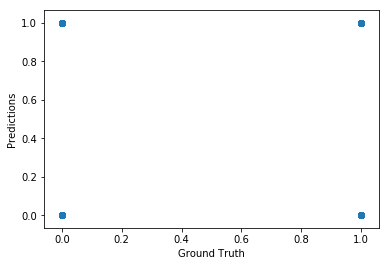

In [105]:
#Plotting the Results
#plt.scatter(y_test, predictions, color=['blue','green'], alpha = 0.5)
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [106]:
classifierKnn = KNeighborsClassifier(n_neighbors = 2)
classifierKnn.fit(X_train, y_train)
y_pred = classifierKnn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6636  401]
 [1751  212]]
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      7037
           1       0.35      0.11      0.16      1963

    accuracy                           0.76      9000
   macro avg       0.57      0.53      0.51      9000
weighted avg       0.69      0.76      0.71      9000



In [107]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

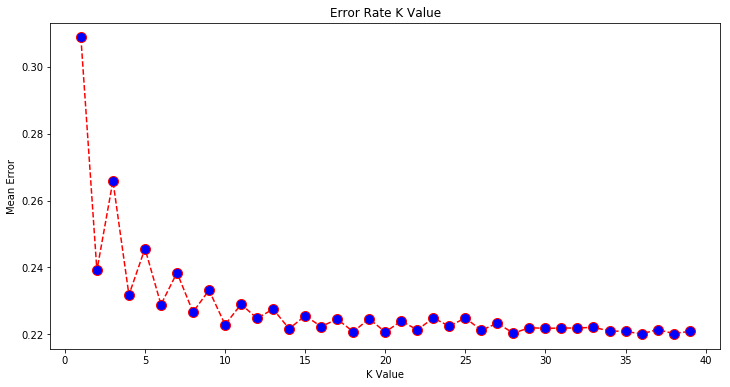

In [108]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Train, test with SVC

In [109]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

In [110]:
classifierSVC = SVC()
# run grid search
grid_search = GridSearchCV(estimator = classifierSVC, param_grid = param_grid, scoring='accuracy',
                          cv = 2, n_jobs = -1, verbose = 2)
start = time.time()
grid_search.fit(X_train, y_train)
 
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time.time() - start, len(grid_search.cv_results_)))
report(grid_search.cv_results_)

Fitting 2 folds for each of 25 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 27.1min finished


GridSearchCV took 1923.29 seconds for 13 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.779 (std: 0.001)
Parameters: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

Model with rank: 2
Mean validation score: 0.779 (std: 0.000)
Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Model with rank: 3
Mean validation score: 0.778 (std: 0.001)
Parameters: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}



In [111]:
grid_search.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [112]:
final_model = grid_search.best_estimator_
y_pred = final_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7001   36]
 [1920   43]]
              precision    recall  f1-score   support

           0       0.78      0.99      0.88      7037
           1       0.54      0.02      0.04      1963

    accuracy                           0.78      9000
   macro avg       0.66      0.51      0.46      9000
weighted avg       0.73      0.78      0.70      9000



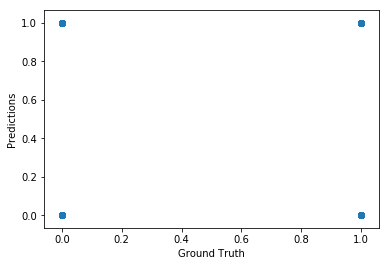

In [113]:
#Plotting the Results
#plt.scatter(y_test, predictions, color=['blue','green'], alpha = 0.5)
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();